Iteration 1, Best Distance: 275.91
Iteration 2, Best Distance: 275.91
Iteration 3, Best Distance: 275.91
Iteration 4, Best Distance: 275.91
Iteration 5, Best Distance: 275.91
Iteration 6, Best Distance: 275.91
Iteration 7, Best Distance: 275.91
Iteration 8, Best Distance: 275.91
Iteration 9, Best Distance: 275.91
Iteration 10, Best Distance: 275.91
Iteration 11, Best Distance: 275.91
Iteration 12, Best Distance: 275.91
Iteration 13, Best Distance: 275.91
Iteration 14, Best Distance: 275.91
Iteration 15, Best Distance: 275.91
Iteration 16, Best Distance: 275.91
Iteration 17, Best Distance: 275.91
Iteration 18, Best Distance: 275.91
Iteration 19, Best Distance: 275.91
Iteration 20, Best Distance: 275.91
Iteration 21, Best Distance: 275.91
Iteration 22, Best Distance: 275.91
Iteration 23, Best Distance: 275.91
Iteration 24, Best Distance: 275.91
Iteration 25, Best Distance: 275.91
Iteration 26, Best Distance: 275.91
Iteration 27, Best Distance: 275.91
Iteration 28, Best Distance: 275.91
I

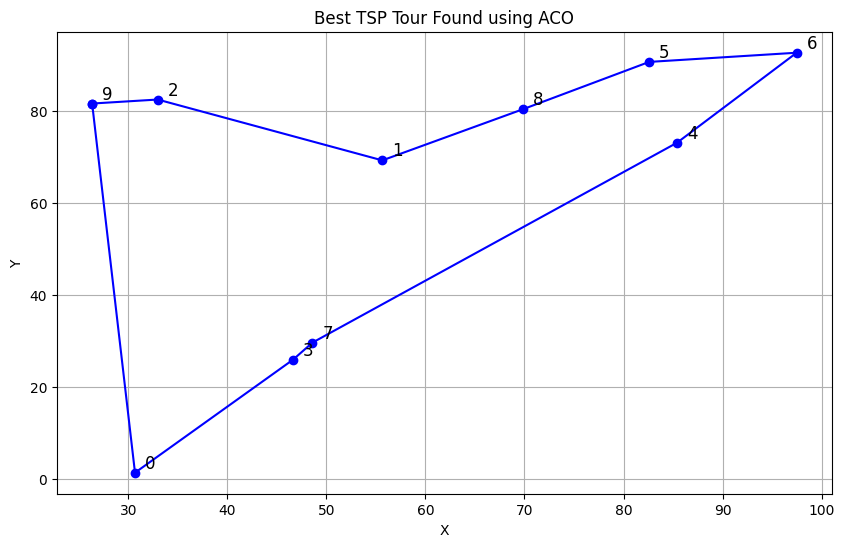

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------- Parameters -----------------------------
NUM_CITIES = 10
NUM_ANTS = 20
NUM_ITERATIONS = 100
ALPHA = 1        # Pheromone importance
BETA = 5         # Distance priority
EVAPORATION = 0.5
Q = 100          # Pheromone deposit factor

# ---------------------------- Distance Matrix -------------------------
# Generate random city coordinates
city_coordinates = np.random.rand(NUM_CITIES, 2) * 100

# Calculate distance matrix
distance_matrix = np.zeros((NUM_CITIES, NUM_CITIES))
for i in range(NUM_CITIES):
    for j in range(NUM_CITIES):
        if i != j:
            distance_matrix[i][j] = np.linalg.norm(city_coordinates[i] - city_coordinates[j])

# --------------------------- ACO Functions ----------------------------
def initialize_pheromone():
    return np.ones((NUM_CITIES, NUM_CITIES))

def probability(i, j, pheromone, visited):
    if j in visited:
        return 0
    pheromone_val = pheromone[i][j] ** ALPHA
    distance_val = (1 / distance_matrix[i][j]) ** BETA
    return pheromone_val * distance_val

def select_next_city(current_city, pheromone, visited):
    probs = [probability(current_city, j, pheromone, visited) for j in range(NUM_CITIES)]
    total = sum(probs)
    if total == 0:
        return random.choice([j for j in range(NUM_CITIES) if j not in visited])
    probs = [p / total for p in probs]
    return np.random.choice(range(NUM_CITIES), p=probs)

def total_distance(tour):
    dist = 0
    for i in range(NUM_CITIES):
        dist += distance_matrix[tour[i]][tour[(i + 1) % NUM_CITIES]]
    return dist

def update_pheromone(pheromone, all_tours):
    pheromone *= (1 - EVAPORATION)
    for tour, dist in all_tours:
        for i in range(NUM_CITIES):
            from_city = tour[i]
            to_city = tour[(i + 1) % NUM_CITIES]
            pheromone[from_city][to_city] += Q / dist
            pheromone[to_city][from_city] += Q / dist
    return pheromone

# ----------------------------- ACO Main Loop -----------------------------
def ant_colony_optimization():
    pheromone = initialize_pheromone()
    best_tour = None
    best_distance = float('inf')

    for iteration in range(NUM_ITERATIONS):
        all_tours = []
        for ant in range(NUM_ANTS):
            visited = []
            current_city = random.randint(0, NUM_CITIES - 1)
            visited.append(current_city)

            while len(visited) < NUM_CITIES:
                next_city = select_next_city(current_city, pheromone, visited)
                visited.append(next_city)
                current_city = next_city

            dist = total_distance(visited)
            all_tours.append((visited, dist))

            if dist < best_distance:
                best_tour = visited
                best_distance = dist

        pheromone = update_pheromone(pheromone, all_tours)
        print(f"Iteration {iteration+1}, Best Distance: {best_distance:.2f}")

    return best_tour, best_distance

# ----------------------------- Visualization -----------------------------
def plot_tour(tour):
    tour_coords = [city_coordinates[i] for i in tour] + [city_coordinates[tour[0]]]
    x, y = zip(*tour_coords)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'bo-')
    plt.title("Best TSP Tour Found using ACO")
    for i, (x_i, y_i) in enumerate(city_coordinates):
        plt.text(x_i + 1, y_i + 1, f"{i}", fontsize=12)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# ----------------------------- Run ACO -----------------------------
best_tour, best_distance = ant_colony_optimization()
print("\nBest Tour:", best_tour)
print("Best Distance:", round(best_distance, 2))

# Plot the best tour
plot_tour(best_tour)